Assumptions of linear regression model:
1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.
How to know? - The easiest way to detect if this assumption is met is to create a scatter plot of x vs. y. 

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.

5. Multicollinearity: If two of the independent features are highly correlated, we say  they are multicollinear.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [42]:
data = pd.read_csv("advertising.csv")

### EDA on data

In [43]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [45]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [46]:
data.duplicated(subset=['TV','Newspaper','Radio']).any()

False

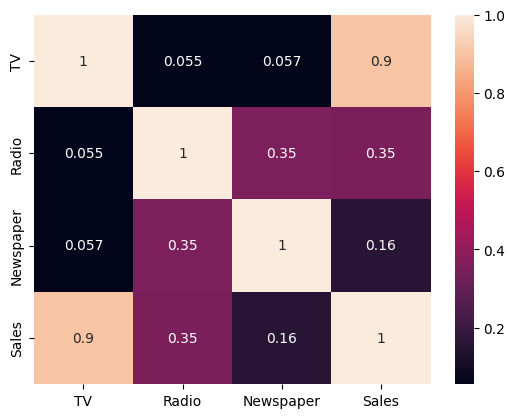

In [47]:
sns.heatmap(data.corr(), annot = True)
plt.show()

The above plot we see there is no strong correlation between any features. This satisfies the multicollinearity assumption. 

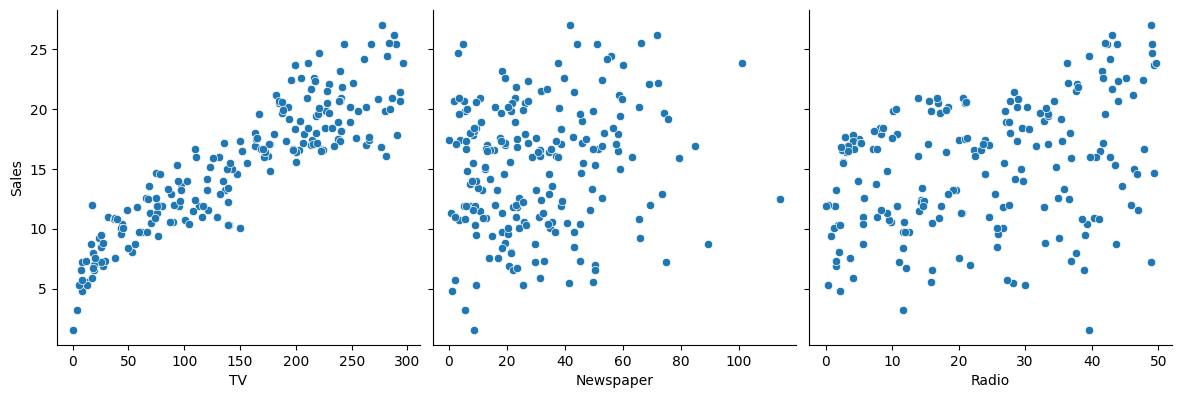

In [48]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

- Looking at the corelation matrix we see the TV medium has the highest value. 
- The scatter plot for the TV also satisfies the linear relationship assumption.
- Therefore we will be using TV as our feature for the lr model

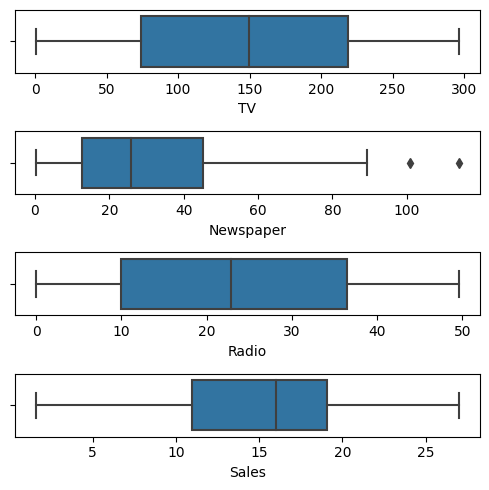

In [49]:
# Checking if there is any significant outliers among the data
fig, ax = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(x=data['TV'], ax = ax[0])
plt2 = sns.boxplot(x=data['Newspaper'], ax = ax[1])
plt3 = sns.boxplot(x=data['Radio'], ax = ax[2])
plt4 = sns.boxplot(x=data['Sales'], ax = ax[3])
plt.tight_layout()
plt.show()

### Model training

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
X = np.array(data['TV']).reshape(-1, 1)
y = np.array(data['Sales']).reshape(-1, 1)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 24)

In [93]:
lr_pipeline = make_pipeline(StandardScaler(), LinearRegression())

In [94]:
lr_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [95]:
lr_pipeline.fit(X_train, y_train)
print(lr_pipeline.score(X_test, y_test))

0.8153478251007712


In [96]:
y_train_pred = lr_pipeline.predict(X_train)
y_pred = lr_pipeline.predict(X_test)

### Model Evaluation

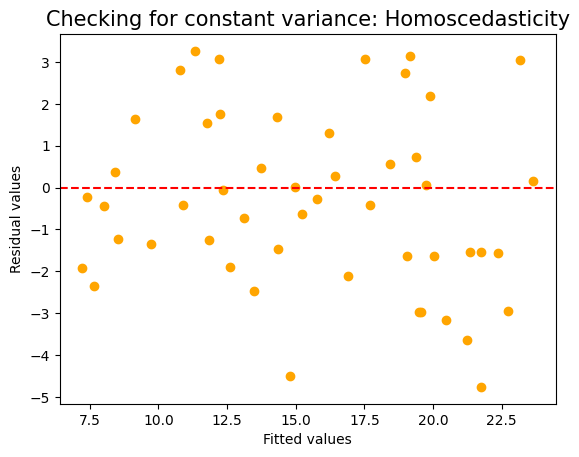

In [97]:
plt.scatter(y_pred, (y_test - y_pred), color ='orange')
plt.axhline(y=0,color='r',ls='--')
plt.title('Checking for constant variance: Homoscedasticity', fontsize = 15) 
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.show()

From the above plot we can say the residuals are spread uniformly, this satisfies assumption of homoscedasticity.

<Figure size 640x480 with 0 Axes>

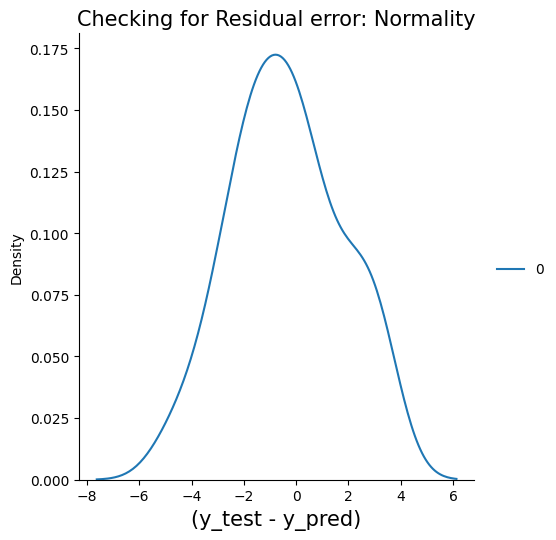

In [98]:
fig = plt.figure()
sns.displot((y_test - y_pred),kind='kde')
plt.title('Checking for Residual error: Normality', fontsize = 15) 
plt.xlabel('(y_test - y_pred)', fontsize = 15)
plt.show()

This gives us the confirmation that the residuals are normally distributed. We can safely say we satisfy the normality assumption of linear regression.

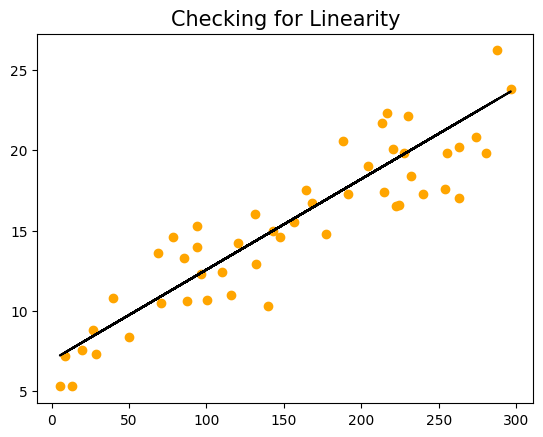

In [61]:
plt.scatter(X_test, y_test, color ='orange')
plt.plot(X_test, y_pred, color ='k') 
plt.title('Checking for Linearity', fontsize = 15) 
plt.show()

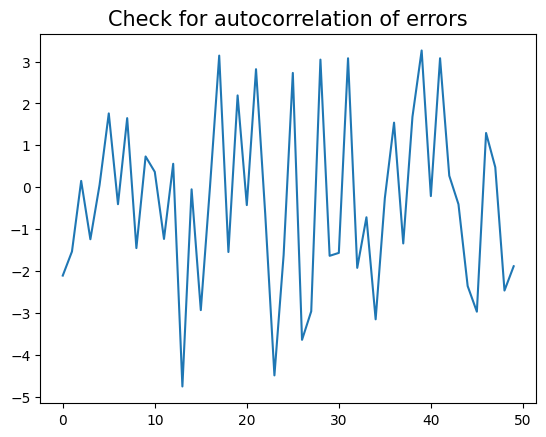

In [99]:
plt.plot((y_test-y_pred))
plt.title('Check for autocorrelation of errors', fontsize = 15) 
plt.show()

Since the above plot has no particular pattern we satisfy no autocorrelation of errors

### Metrics definitions:

- MSE : 
    - It is the residual error which is represented as sum of squared difference between true values and predicted values divided by the total number of data-rows
    - This measures the standard deviation of residuals  
<br/>
- RMSE : 
    - It is square root of MSE.
    - This measures the standard deviation of residuals  
<br/>
- MAE : 
    - It represents the average of absolute difference between true values and predicted values divided by the total number of data-rows
<br/><br/>
- R squared :
    - The coefficient of determination or represents the proportion of the variance in the dependent variable which is explained by the linear regression model. 
    - It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
<br/><br/>
- Lower the values of MAE, MSE, and RMSE implies higher accuracy of a regression model. For R square a higher value is desirable.

#### Metrics on train set

In [19]:
print(f'MAE= {mean_absolute_error(y_true=y_train,y_pred=y_train_pred)}')
print(f'MSE= {mean_squared_error(y_true=y_train,y_pred=y_train_pred)}')
print(f'RMSE= {mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)}')
print(f'R-squared= {r2_score(y_true=y_train,y_pred=y_train_pred)}')

MAE= 1.8671081723048686
MSE= 5.511730863418034
RMSE= 2.347707576215154
R-squared= 0.8105947168390881


The R-squared value means that 81.05% of the vairance in our Sales can be explained by the TV feature

#### Metrics on test set

In [63]:
print(f'MAE= {mean_absolute_error(y_true=y_test,y_pred=y_pred)}')
print(f'MSE= {mean_squared_error(y_true=y_test,y_pred=y_pred)}')
print(f'RMSE= {mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)}')
print(f'R-squared= {r2_score(y_true=y_test,y_pred=y_pred)}')

MAE= 1.7180468005993381
MSE= 4.396447152523905
RMSE= 2.0967706485268973
R-squared= 0.8153478251007712


The R-squared of test set is 0.815 which implies:
- The R-squared value of train and test are similar which indicates that we have built a good model